In this new notebook we are going to train a new model with different features. Mostly we want add period 200 MA

In [1]:
import numpy as np
import pandas as pd
import os, sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, MaxPooling1D, Conv1D, Flatten


In [2]:
route = os.getcwd()
new_route = os.path.dirname(route)
sys.path.append(route)

In [29]:
from utils.mining_data_tb import add_short_features
from utils.models import build_short_CNN_model
from utils.models import LSTM_preprocessing
from utils.models import parse_str_pred_to_float

In [4]:
df = pd.read_csv('../data/all_together_forex.csv')
df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume
0,2016.01.03,17:00,1.08701,1.08713,1.08701,1.08713,0
1,2016.01.03,17:01,1.08712,1.08712,1.08712,1.08712,0
2,2016.01.03,17:02,1.08708,1.08722,1.08708,1.08722,0
3,2016.01.03,17:03,1.08717,1.08723,1.08717,1.08723,0
4,2016.01.03,17:04,1.08718,1.08718,1.08711,1.08711,0
...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0


In [5]:
path = '../data'
file_name = 'short_featured'

In [6]:
featured_df = add_short_features(df, file_name = file_name, path = path)

In [7]:
short_df = pd.read_csv('../data/short_featured.csv')


In [8]:
short_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,EMA_20
0,2016.01.03,17:00,1.08701,1.08713,1.08701,1.08713,0,NaN,NaN,NaN
1,2016.01.03,17:01,1.08712,1.08712,1.08712,1.08712,0,NaN,NaN,NaN
2,2016.01.03,17:02,1.08708,1.08722,1.08708,1.08722,0,NaN,NaN,NaN
3,2016.01.03,17:03,1.08717,1.08723,1.08717,1.08723,0,NaN,NaN,NaN
4,2016.01.03,17:04,1.08718,1.08718,1.08711,1.08711,0,1.087162,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.223276
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.223277
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.223279
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.223280


In [9]:
final_df = short_df.dropna()

In [10]:
final_df

,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Bar CLOSE Bid Quote,Volume,SMA_5,SMA_20,EMA_20
19,2016.01.03,17:19,1.08665,1.08665,1.08663,1.08664,0,1.086668,1.086912,1.086799
20,2016.01.03,17:20,1.08663,1.08663,1.08663,1.08663,0,1.086656,1.086888,1.086781
21,2016.01.03,17:21,1.08674,1.08704,1.08674,1.08704,0,1.086734,1.086883,1.086809
22,2016.01.03,17:22,1.08714,1.08714,1.08704,1.08704,0,1.086804,1.086874,1.086833
23,2016.01.03,17:23,1.08693,1.08693,1.08667,1.08693,0,1.086856,1.086860,1.086843
...,...,...,...,...,...,...,...,...,...,...
2013228,2021.05.31,19:53,1.22332,1.22332,1.22329,1.22330,0,1.223316,1.223283,1.223276
2013229,2021.05.31,19:54,1.22330,1.22330,1.22329,1.22329,0,1.223316,1.223291,1.223277
2013230,2021.05.31,19:55,1.22327,1.22331,1.22326,1.22330,0,1.223308,1.223304,1.223279
2013231,2021.05.31,19:57,1.22329,1.22329,1.22329,1.22329,0,1.223302,1.223315,1.223280


In [11]:
test_df = final_df.loc[2000000:]

In [12]:
test_df['Close Price'] = test_df['Bar CLOSE Bid Quote']
test_df = test_df.drop(columns='Bar CLOSE Bid Quote', axis= 1)
test_df = test_df.set_index(test_df['Date'])
test_df

C:\Users\jarai\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Time,Bar OPEN Bid Quote,Bar HIGH Bid Quote,Bar LOW Bid Quote,Volume,SMA_5,SMA_20,EMA_20,Close Price
Date,,,,,,,,,,
2021.05.18,2021.05.18,13:26,1.22160,1.22162,1.22158,0,1.221588,1.221577,1.221588,1.22160
2021.05.18,2021.05.18,13:27,1.22159,1.22162,1.22159,0,1.221592,1.221577,1.221590,1.22160
2021.05.18,2021.05.18,13:28,1.22159,1.22159,1.22158,0,1.221594,1.221577,1.221590,1.22159
2021.05.18,2021.05.18,13:29,1.22160,1.22163,1.22159,0,1.221602,1.221583,1.221593,1.22163
2021.05.18,2021.05.18,13:30,1.22168,1.22173,1.22168,0,1.221630,1.221592,1.221606,1.22173
...,...,...,...,...,...,...,...,...,...,...
2021.05.31,2021.05.31,19:53,1.22332,1.22332,1.22329,0,1.223316,1.223283,1.223276,1.22330
2021.05.31,2021.05.31,19:54,1.22330,1.22330,1.22329,0,1.223316,1.223291,1.223277,1.22329
2021.05.31,2021.05.31,19:55,1.22327,1.22331,1.22326,0,1.223308,1.223304,1.223279,1.22330


In [17]:
x_train, x_test,y_train, y_test = LSTM_preprocessing(test_df, step= 10, train_size= 0.5)

In [18]:
x_train.shape

(6616, 8, 10)

In [19]:
y_train.shape

(6616, 1)

In [20]:
CNN_model = build_short_CNN_model(embedding= 10)
CNN_model.fit(x_train, y_train, batch_size= 10, epochs= 150)

Epoch 1/150
662/662 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 2/150
662/662 [==============================] - 1s 1ms/step - loss: 7.7643e-08
Epoch 3/150
662/662 [==============================] - 1s 1ms/step - loss: 8.6624e-08
Epoch 4/150
662/662 [==============================] - 1s 1ms/step - loss: 1.0152e-07
Epoch 5/150
662/662 [==============================] - 1s 1ms/step - loss: 1.1287e-07
Epoch 6/150
662/662 [==============================] - 1s 1ms/step - loss: 1.9986e-07
Epoch 7/150
662/662 [==============================] - 1s 1ms/step - loss: 2.7658e-07
Epoch 8/150
662/662 [==============================] - 1s 1ms/step - loss: 8.8151e-07
Epoch 9/150
662/662 [==============================] - 1s 1ms/step - loss: 8.2092e-06
Epoch 10/150
662/662 [==============================] - 1s 1ms/step - loss: 1.1956e-05
Epoch 11/150
662/662 [==============================] - 1s 1ms/step - loss: 1.2334e-05
Epoch 12/150
662/662 [==============================] - 

In [21]:
prediction = CNN_model.predict(x_test)

In [22]:
prediction

array([[1.2258145],
       [1.2258315],
       [1.2258619],
       ...,
       [1.2238826],
       [1.2238828],
       [1.2238814]], dtype=float32)

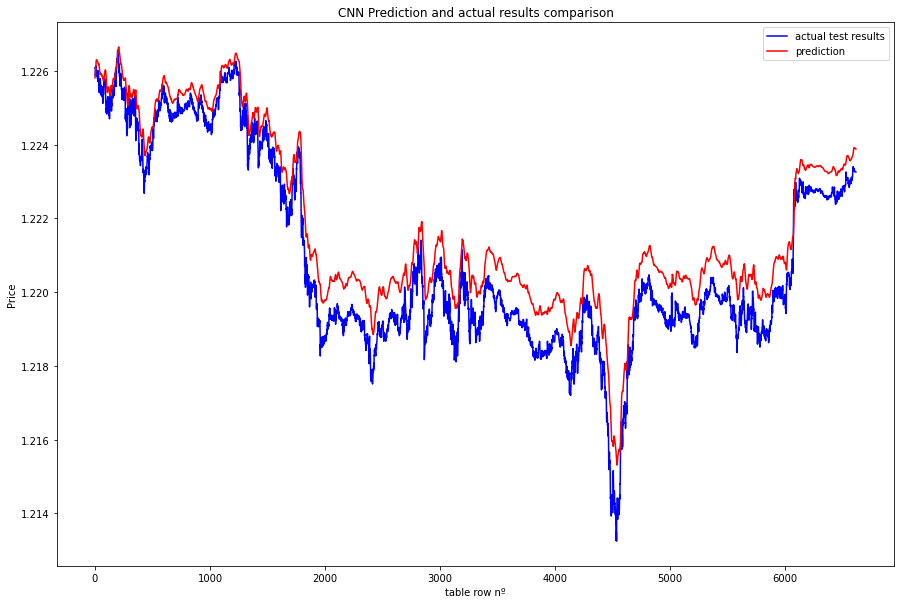

In [24]:
plt.figure(figsize=(15, 10))
plt.plot( y_test, c= 'blue', label= 'actual test results')
plt.plot( prediction, c= 'red', label= 'prediction')
plt.title('CNN Prediction and actual results comparison')
plt.xlabel('table row nº')
plt.ylabel('Price')
plt.legend()


In [25]:
CNN_model.save('./models/short_CNN.h5')
CNN_model.save_weights('./models/short_CNN_weights.h4')

In [26]:
live_test = pd.read_csv('../data/historico_corto1.csv')
live_test

,Unnamed: 0,prediction date,close price,prediction
0,0,2021-08-31 20:58:59.584567,1.18085,[1.1858343]
1,1,2021-08-31 21:04:00.673311,1.18085,[1.1856872]
2,2,2021-08-31 21:04:59.677244,1.18064,[1.1858742]
3,3,2021-08-31 21:06:59.570375,1.18091,[1.1858655]
4,4,2021-08-31 21:13:15.499181,1.18090,[1.1857682]
...,...,...,...,...
166,166,2021-09-01 00:16:59.442188,1.18086,[1.1858997]
167,167,2021-09-01 00:18:00.262651,1.18093,[1.1858095]
168,168,2021-09-01 00:19:10.658646,1.18080,[1.1858397]
169,169,2021-09-01 00:20:00.181112,1.18085,[1.1858428]


In [ ]:
parse_str_pred_to_float(live_test)

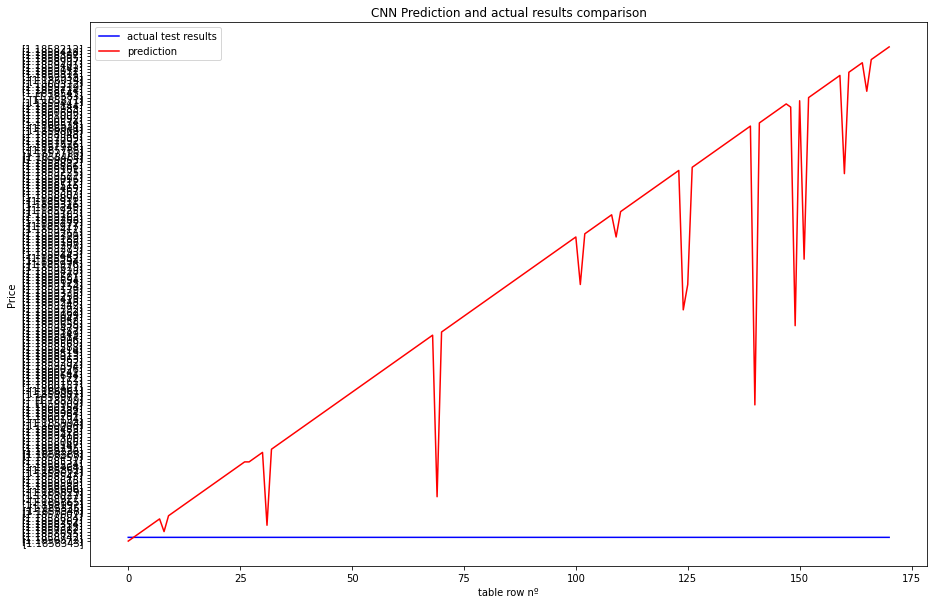

In [27]:
plt.figure(figsize=(15, 10))
plt.plot( live_test['close price'], c= 'blue', label= 'actual test results')
plt.plot( live_test['prediction'], c= 'red', label= 'prediction')
plt.title('CNN Prediction and actual results comparison')
plt.xlabel('table row nº')
plt.ylabel('Price')
plt.legend()